In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
raw_dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
raw_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
raw_dataset.info() # 3 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
raw_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dataset = raw_dataset.copy()

In [ ]:
dataset = pd.get_dummies(data = dataset, columns = ["sex", "smoker", "region"])
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y
X = dataset.drop("charges", axis = 1)
y = dataset[["charges"]]

### Without Normalize data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
model_noNormalizeBasic = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [11])
])

model_noNormalizeBasic.compile(loss = tf.keras.losses.mae,
                               optimizer = tf.keras.optimizers.SGD(),
                               metrics = ["mae"])

In [ ]:
history = model_noNormalizeBasic.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 12930.5957 - mae: 12930.5957
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12085.6104 - mae: 12085.6104
Epoch 3/100
34/34 [==============================] - 0s 1000us/step - loss: 11255.4766 - mae: 11255.4766
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 10493.4697 - mae: 10493.4697
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 9843.6309 - mae: 9843.6309
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9293.4102 - mae: 9293.4102
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8820.0977 - mae: 8820.0977
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 8432.2373 - mae: 8432.2373
Epoch 9/100
34/34 [==============================] - 0s 999us/step - loss: 8123.9590 - mae: 8123.9590
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7883.7178 - m

In [ ]:
model_noNormalizeBasic.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 6999.3101 - mae: 6999.3101


[6999.31005859375, 6999.31005859375]

We'll try 3 things:
* Increasing the number of layers (2 -> 3).
* Increasing the number of units in each layer (except for the output layer).
* Changing the optimizer (from SGD to Adam).

In [ ]:
model_noNormalizeAdvanced = tf.keras.Sequential()

model_noNormalizeAdvanced.add(tf.keras.layers.Dense(100, activation = "relu"))
model_noNormalizeAdvanced.add(tf.keras.layers.Dense(100, activation = "relu"))
model_noNormalizeAdvanced.add(tf.keras.layers.Dense(100, activation = "relu"))
model_noNormalizeAdvanced.add(tf.keras.layers.Dense(1))

model_noNormalizeAdvanced.compile(loss = tf.keras.losses.mae,
                                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                                  metrics = ["mae"])




In [ ]:
history = model_noNormalizeAdvanced.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
34/34 [==============================] - 0s 1ms/step - loss: 3928.9233 - mae: 3928.9233
Epoch 2/1000
34/34 [==============================] - 0s 1ms/step - loss: 3906.9910 - mae: 3906.9910
Epoch 3/1000
34/34 [==============================] - 0s 1ms/step - loss: 3888.8657 - mae: 3888.8657
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 3874.9460 - mae: 3874.9460
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 3857.9990 - mae: 3857.9990
Epoch 6/1000
34/34 [==============================] - 0s 1ms/step - loss: 3840.4707 - mae: 3840.4707
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 3823.2646 - mae: 3823.2646
Epoch 8/1000
34/34 [==============================] - 0s 1ms/step - loss: 3810.7136 - mae: 3810.7136
Epoch 9/1000
34/34 [==============================] - 0s 1ms/step - loss: 3797.6196 - mae: 3797.6196
Epoch 10/1000
34/34 [==============================] - 0s 1ms/step - loss: 3786.8621 - mae:

In [ ]:
model_noNormalizeAdvanced.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2160.3774 - mae: 2160.3774


[2160.37744140625, 2160.37744140625]

In [ ]:
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae'])

In [ ]:
history_noNormalizeAdvanced = pd.DataFrame(history.history)
history_noNormalizeAdvanced

,loss,mae
0,3928.923340,3928.923340
1,3906.990967,3906.990967
2,3888.865723,3888.865723
3,3874.946045,3874.946045
4,3857.999023,3857.999023
...,...,...
995,2341.070801,2341.070801
996,2343.120361,2343.120361
997,2341.257568,2341.257568
998,2342.559814,2342.559814


Text(0.5, 0, 'epochs')

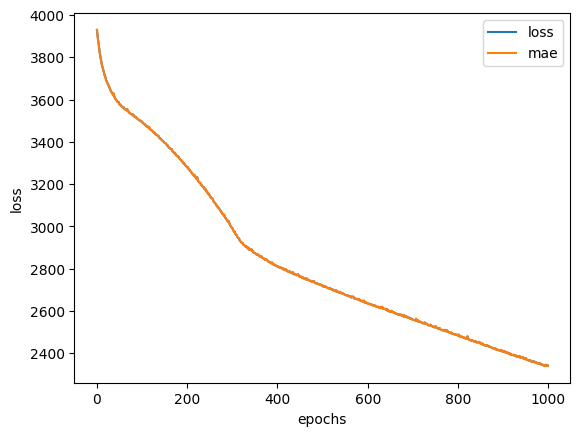

In [ ]:
history_noNormalizeAdvanced.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# With Normalize data

In [ ]:
# sklearn MinMaxScaler, OneHotEncoder

In [ ]:
dataset = raw_dataset.copy()

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    )

In [ ]:
X = dataset.drop("charges", axis=1)
y = dataset["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test) # X_test transform by X_train

In [ ]:
## Functional API

inputs = tf.keras.Input(shape = (11))
outputs = tf.keras.layers.Dense(1)(inputs)


model_normalizeBasic = tf.keras.Model(inputs = inputs, outputs = outputs)

model_normalizeBasic.compile(loss = tf.keras.losses.mae,
                             optimizer = tf.keras.optimizers.SGD(),
                             metrics = ["mae"])

In [ ]:
model_normalizeBasic.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.8086 - mae: 13345.8086
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.8398 - mae: 13344.8398
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13343.8740 - mae: 13343.8740
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.9092 - mae: 13342.9092
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13341.9424 - mae: 13341.9424
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13340.9775 - mae: 13340.9775
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13340.0088 - mae: 13340.0088
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13339.0439 - mae: 13339.0439
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13338.0752 - mae: 13338.0752
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13337.11

In [ ]:
inputs = tf.keras.Input(shape = (11))
Dense_1 = tf.keras.layers.Dense(100, activation = "relu")(inputs)
Dense_2 = tf.keras.layers.Dense(100, activation = "relu")(Dense_1)
Dense_3 = tf.keras.layers.Dense(100, activation = "relu")(Dense_2)
outputs = tf.keras.layers.Dense(1)(Dense_3)


model_normalizeAdvanced = tf.keras.Model(inputs = inputs, outputs = outputs)

model_normalizeAdvanced.compile(loss = tf.keras.losses.mae,
                             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                             metrics = ["mae"])

In [ ]:
history = model_normalizeAdvanced.fit(X_train_normal, y_train,epochs = 1000)

Epoch 1/1000
34/34 [==============================] - 1s 1ms/step - loss: 13345.9844 - mae: 13345.9844
Epoch 2/1000
34/34 [==============================] - 0s 1ms/step - loss: 13345.6436 - mae: 13345.6436
Epoch 3/1000
34/34 [==============================] - 0s 1ms/step - loss: 13345.1631 - mae: 13345.1631
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 13344.3652 - mae: 13344.3652
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 13342.9805 - mae: 13342.9805
Epoch 6/1000
34/34 [==============================] - 0s 2ms/step - loss: 13340.5713 - mae: 13340.5713
Epoch 7/1000
34/34 [==============================] - 0s 1ms/step - loss: 13336.5049 - mae: 13336.5049
Epoch 8/1000
34/34 [==============================] - 0s 1ms/step - loss: 13329.8867 - mae: 13329.8867
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 13319.6631 - mae: 13319.6631
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss

Text(0, 0.5, 'loss')

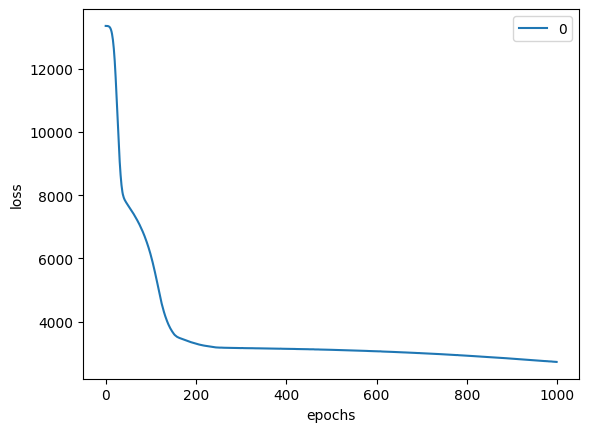

In [ ]:
pd.DataFrame(history.history["loss"]).plot()
plt.xlabel("epochs")
plt.ylabel("loss")